OLS theta: [0.5 1.6]
Ridge λ=1 theta: [1.16666667 1.33333333]
Ridge λ=5 theta: [2.5 0.8]


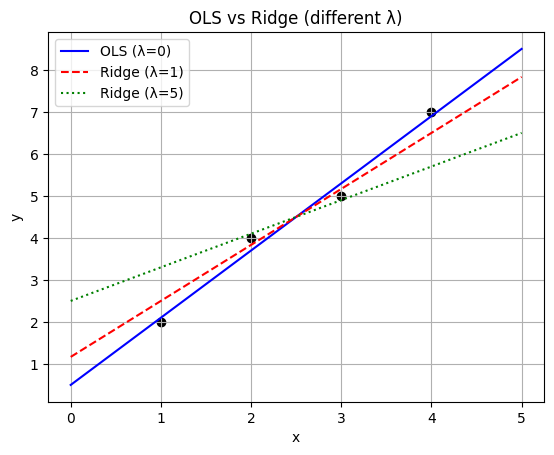

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([1,2,3,4])
y = np.array([2,4,5,7])
m = len(X)
X_design = np.vstack([np.ones(m), X]).T  # shape (4,2)


def ridge_closed_form(Xd, y, lam):
    L = np.eye(Xd.shape[1])
    L[0,0] = 0.0
    theta = np.linalg.inv(Xd.T @ Xd + lam * L) @ (Xd.T @ y)
    return theta

theta_ols = ridge_closed_form(X_design, y, lam=0.0)
theta_r1  = ridge_closed_form(X_design, y, lam=1.0)
theta_r5  = ridge_closed_form(X_design, y, lam=5.0)

print("OLS theta:", theta_ols)
print("Ridge λ=1 theta:", theta_r1)
print("Ridge λ=5 theta:", theta_r5)

# Plot
xx = np.linspace(0,5,100)
yy_ols = theta_ols[0] + theta_ols[1]*xx
yy_r1  = theta_r1[0]  + theta_r1[1]*xx
yy_r5  = theta_r5[0]  + theta_r5[1]*xx

plt.scatter(X, y, color='black')
plt.plot(xx, yy_ols, label='OLS (λ=0)', color='blue')
plt.plot(xx, yy_r1,  label='Ridge (λ=1)', linestyle='--', color='red')
plt.plot(xx, yy_r5,  label='Ridge (λ=5)', linestyle=':', color='green')
plt.legend(); plt.xlabel('x'); plt.ylabel('y'); plt.title('OLS vs Ridge (different λ)'); plt.grid(True)
plt.show()


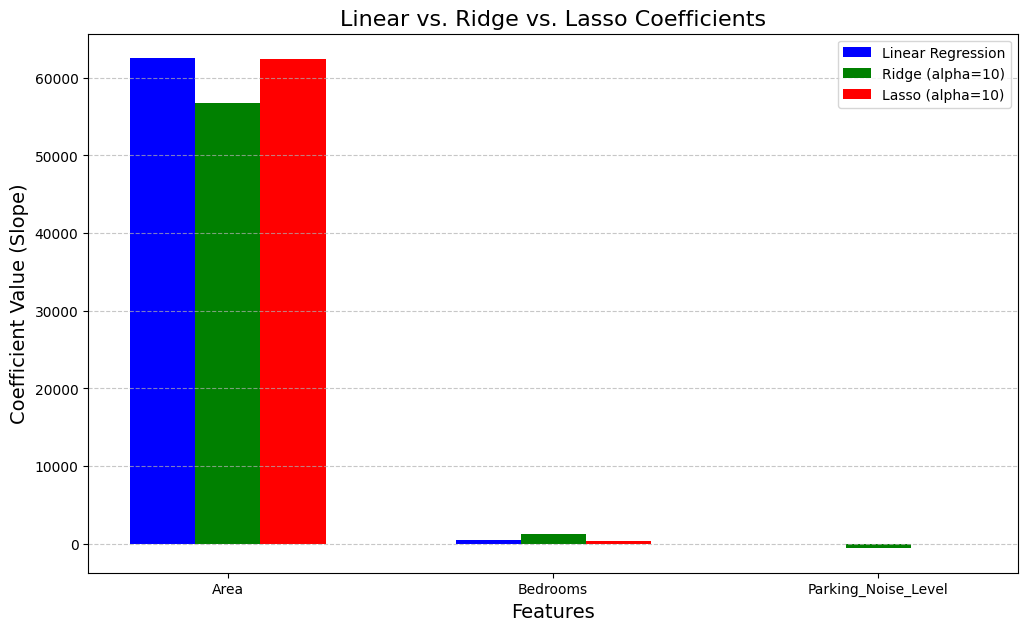


--- Coefficients (Slopes) ---
| Feature             |   Linear Regression |   Ridge Regression |   Lasso Regression |
|:--------------------|--------------------:|-------------------:|-------------------:|
| Area                |          62524.8    |           56726.3  |           62439    |
| Bedrooms            |            458.989  |            1208.47 |             358.12 |
| Parking_Noise_Level |            -39.7849 |            -544.21 |              -0    |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


np.random.seed(42)  
Area = np.random.randint(800, 3000, 100)
Bedrooms = np.random.randint(1, 6, 100)

Parking_Noise_Level = np.random.rand(100) * 10 


Price = 100 * Area + 500 * Bedrooms + np.random.randn(100) * 5000

data = pd.DataFrame({
    'Area': Area,
    'Bedrooms': Bedrooms,
    'Parking_Noise_Level': Parking_Noise_Level,
    'Price': Price
})

X = data[['Area', 'Bedrooms', 'Parking_Noise_Level']]
y = data['Price']

#  Scaling (BAHUT ZAROORI STEP)
# Ridge aur Lasso scale-sensitive hote hain. Humesha scale karein!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lr = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=101)

lr.fit(X_scaled, y)
ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)


features = X.columns
lr_coef = lr.coef_
ridge_coef = ridge.coef_
lasso_coef = lasso.coef_


plt.figure(figsize=(12, 7))
bar_width = 0.2
index = np.arange(len(features))

plt.bar(index, lr_coef, bar_width, label='Linear Regression', color='blue')
plt.bar(index + bar_width, ridge_coef, bar_width, label='Ridge (alpha=10)', color='green')
plt.bar(index + 2*bar_width, lasso_coef, bar_width, label='Lasso (alpha=10)', color='red')

plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Value (Slope)', fontsize=14)
plt.title('Linear vs. Ridge vs. Lasso Coefficients', fontsize=16)
plt.xticks(index + bar_width, features)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("\n--- Coefficients (Slopes) ---")
coef_df = pd.DataFrame({
    'Feature': features,
    'Linear Regression': lr_coef,
    'Ridge Regression': ridge_coef,
    'Lasso Regression': lasso_coef
})
print(coef_df.to_markdown(index=False))

--- Coefficients (Slopes) ---
| Feature    |   Linear Regression |   Ridge (alpha=1) |   Lasso (alpha=0.1) |
|:-----------|--------------------:|------------------:|--------------------:|
| MedInc     |           0.829619  |        0.829593   |           0.705713  |
| AveBedrms  |           0.305696  |        0.305525   |          -0         |
| HouseAge   |           0.118752  |        0.118817   |           0.106011  |
| Population |          -0.004503  |       -0.00448006 |          -0         |
| AveOccup   |          -0.0393263 |       -0.0393298  |          -0         |
| AveRooms   |          -0.265527  |       -0.265397   |          -0         |
| Longitude  |          -0.870541  |       -0.869916   |          -0         |
| Latitude   |          -0.899886  |       -0.899266   |          -0.0112127 |


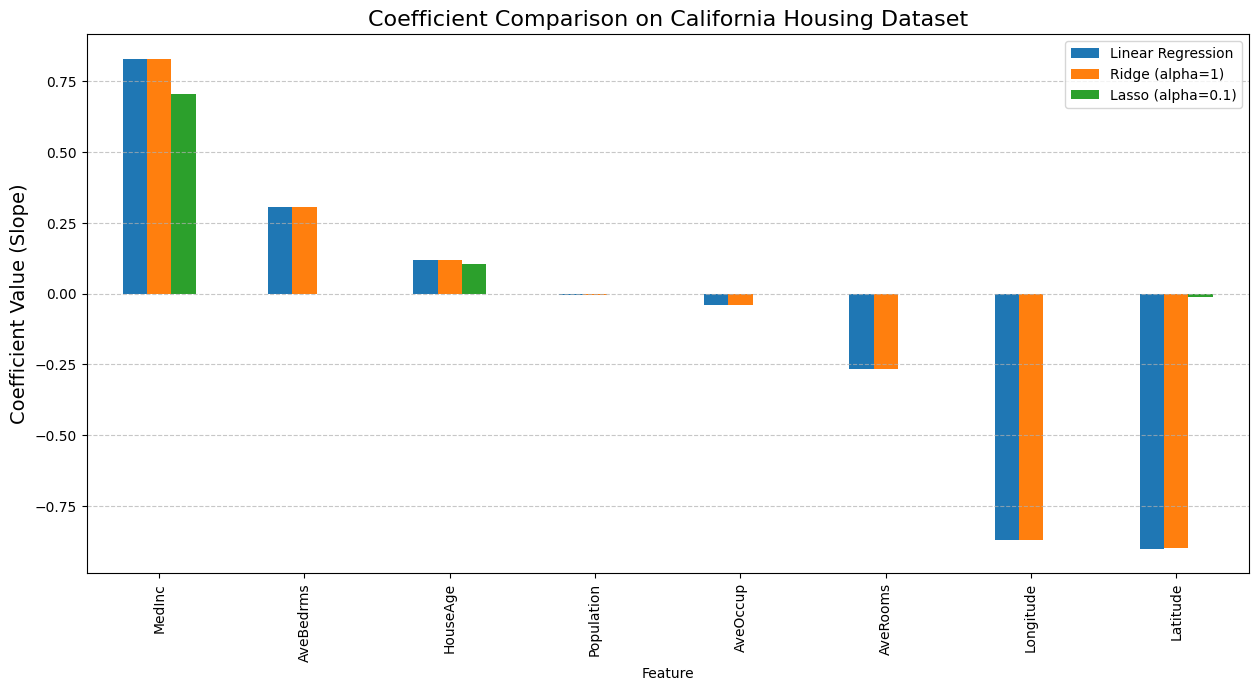

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso


housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lr = LinearRegression()
ridge = Ridge(alpha=1.0)  
lasso = Lasso(alpha=0.1)  

lr.fit(X_scaled, y)
ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)


coefficients = pd.DataFrame({
    'Feature': housing.feature_names,
    'Linear Regression': lr.coef_,
    'Ridge (alpha=1)': ridge.coef_,
    'Lasso (alpha=0.1)': lasso.coef_
})


coefficients = coefficients.sort_values(by='Linear Regression', ascending=False)

# 5. Results ko Print Karna
print("--- Coefficients (Slopes) ---")
print(coefficients.to_markdown(index=False))


coefficients.plot(x='Feature', y=['Linear Regression', 'Ridge (alpha=1)', 'Lasso (alpha=0.1)'], 
                  kind='bar', figsize=(15, 7))
plt.title('Coefficient Comparison on California Housing Dataset', fontsize=16)
plt.ylabel('Coefficient Value (Slope)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()